### Shoping mall customer valuation

#### Importbasic library

In [70]:
import os
import numpy  as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import chardet

In [3]:
df= pd.read_csv('shopping_mall.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 107419: invalid start byte

In [4]:
with open('shopping_mall.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
df=pd.read_csv("shopping_mall.csv",encoding = enc['encoding'])

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,75120.000000,75120.00000,48212.000000
mean,9.043384,5.25234,15257.869327
std,387.339709,116.75314,1765.475916
min,-74215.000000,0.00000,12346.000000
25%,1.000000,1.25000,13767.000000
50%,3.000000,2.46000,15078.000000
75%,9.000000,4.24000,16916.000000
max,74215.000000,16888.02000,18283.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   StockCode    75120 non-null  object 
 2   Description  74915 non-null  object 
 3   Quantity     75120 non-null  int64  
 4   InvoiceDate  75120 non-null  object 
 5   UnitPrice    75120 non-null  float64
 6   CustomerID   48212 non-null  float64
 7   Country      75120 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.6+ MB


In [9]:
df.nunique()

InvoiceNo      3477
StockCode      3160
Description    3080
Quantity        262
InvoiceDate    3198
UnitPrice       510
CustomerID     1428
Country          30
dtype: int64

### Droping the insignificance data


In [11]:
df1= df.drop(['StockCode','Description',"Country"], axis=1)

In [12]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536627,1,12/2/2010 10:53,19.95,15658.0
1,536627,2,12/2/2010 10:53,8.50,15658.0
2,536627,3,12/2/2010 10:53,5.95,15658.0
3,536627,12,12/2/2010 10:53,1.45,15658.0
4,536627,4,12/2/2010 10:53,12.75,15658.0


In [13]:
print(df1['Quantity'].min())

-74215


#### -Ve mean indicates the return of quantity, so thiscase no profit no loss  consider

In [14]:
def handle_neg_values(num):
    if num< 0:
        return 0
    else:
        return num

In [15]:
df1['Quantity']= [handle_neg_values(x) for x in df1.Quantity]

In [17]:
print(df1['Quantity'].min())

0


In [19]:
#### creating a new column oftotalamount
df1['Total']= df1['Quantity']*df['UnitPrice']
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536627,1,12/2/2010 10:53,19.95,15658.0,19.95
1,536627,2,12/2/2010 10:53,8.50,15658.0,17.00
2,536627,3,12/2/2010 10:53,5.95,15658.0,17.85
3,536627,12,12/2/2010 10:53,1.45,15658.0,17.40
4,536627,4,12/2/2010 10:53,12.75,15658.0,51.00


In [20]:
print(df1['Total'].min())

0.0


In [ ]:
#### check missing values

In [23]:
df1.isnull().sum()

InvoiceNo          0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     26908
Total              0
dtype: int64

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   Quantity     75120 non-null  int64  
 2   InvoiceDate  75120 non-null  object 
 3   UnitPrice    75120 non-null  float64
 4   CustomerID   48212 non-null  float64
 5   Total        75120 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 3.4+ MB


In [25]:
df2= df1.dropna(axis=0, how='any')

#### Quantity and Unit price is insignificat bec we taken total for that

In [28]:
df3= df2.drop(['Quantity', 'UnitPrice'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48212 entries, 0 to 75119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    48212 non-null  object 
 1   InvoiceDate  48212 non-null  object 
 2   CustomerID   48212 non-null  float64
 3   Total        48212 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.8+ MB


In [29]:
#### Invoice dat convert into date month 
df3['InvoiceDate']= pd.to_datetime(df3['InvoiceDate'])

In [30]:
df3.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,19.95
1,536627,2010-12-02 10:53:00,15658.0,17.00
2,536627,2010-12-02 10:53:00,15658.0,17.85
3,536627,2010-12-02 10:53:00,15658.0,17.40
4,536627,2010-12-02 10:53:00,15658.0,51.00


#### Observed in invoice - on same date same invoice with same time purchased
#### Remove duplicates
#### Join all rows

In [32]:
df4=df3.copy()
df4= df3.drop(['CustomerID', 'InvoiceDate'], axis=1)
df4.head()

,InvoiceNo,Total
0,536627,19.95
1,536627,17.00
2,536627,17.85
3,536627,17.40
4,536627,51.00


In [36]:
#### Add total with same number of invoice

In [34]:
df5=df4.groupby(['InvoiceNo']).sum()
pd.DataFrame(df5)
df5_final= df5.reset_index()

In [35]:
df5_final.head()

,InvoiceNo,Total
0,536627,217.80
1,536628,230.56
2,536629,22.20
3,536630,244.46
4,536631,22.20


In [37]:
df5_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   InvoiceNo  2940 non-null   object 
 1   Total      2940 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.1+ KB


In [39]:
# from Df3 drop total and remove duplicate in  Invoice number
df3_final=df3.drop(['Total'],axis=1)
df3_final= df3_final.drop_duplicates(subset=['InvoiceNo'])
df3_final.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536627,2010-12-02 10:53:00,15658.0
8,536628,2010-12-02 10:54:00,17850.0
24,536629,2010-12-02 10:55:00,17850.0
26,536630,2010-12-02 10:56:00,17850.0
42,536631,2010-12-02 10:58:00,17850.0


In [40]:
df3_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 75095
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2940 non-null   object        
 1   InvoiceDate  2940 non-null   datetime64[ns]
 2   CustomerID   2940 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 91.9+ KB


In [43]:
df_final= pd.merge(df3_final, df5_final, how= 'left',on ='InvoiceNo')
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536627,2010-12-02 10:53:00,15658.0,217.80
1,536628,2010-12-02 10:54:00,17850.0,230.56
2,536629,2010-12-02 10:55:00,17850.0,22.20
3,536630,2010-12-02 10:56:00,17850.0,244.46
4,536631,2010-12-02 10:58:00,17850.0,22.20


In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 0 to 2939
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    2940 non-null   object        
 1   InvoiceDate  2940 non-null   datetime64[ns]
 2   CustomerID   2940 non-null   float64       
 3   Total        2940 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 114.8+ KB


#### On final dataset we have to find- Recency-Frequency-Monetary Segmentation

#### RFM segmentation is a method to identify groups of customer and valuation


In [50]:
# Recnency- Latest recnt transiction by customerID
# Frequency- No of frequency visit by the customerID
# Monetary- Total no ofmonetary purchase amount done in duration by the customerID 

In [47]:
min(df_final['InvoiceDate'])

Timestamp('2010-12-02 10:53:00')

In [49]:
max(df_final['InvoiceDate'])

Timestamp('2011-06-08 12:21:00')

In [53]:
# Latest_date
import datetime as dt
latest_date= dt.datetime(2011,6,10)

### RFMS Score

In [55]:
RFMScore=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                            "InvoiceNo":lambda x:x.count(),
                                            "Total":lambda x:x.sum()})

In [56]:
RFMScore.head()

,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,142,2,77183.60
12347.0,134,1,475.39
12348.0,135,2,1120.24
12350.0,127,1,334.40
12352.0,100,5,1281.15


In [58]:
RFMScore= RFMScore.reset_index()
RFMScore.head()

,index,CustomerID,InvoiceDate,InvoiceNo,Total
0,0,12346.0,142,2,77183.60
1,1,12347.0,134,1,475.39
2,2,12348.0,135,2,1120.24
3,3,12350.0,127,1,334.40
4,4,12352.0,100,5,1281.15


In [ ]:
# As per RFMScore 
# Change Column name
# Recency - InvoiceDate
#Frequency- CustomerID
# Monetory- Total

In [59]:
RFMScore=RFMScore.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})


In [60]:
RFMScore.head()

,index,CustomerID,Recency,Frequency,Monetary
0,0,12346.0,142,2,77183.60
1,1,12347.0,134,1,475.39
2,2,12348.0,135,2,1120.24
3,3,12350.0,127,1,334.40
4,4,12352.0,100,5,1281.15


In [62]:
RFMScore.drop(["index"],axis=1)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
...,...,...,...,...
1423,18257.0,113,1,328.40
1424,18260.0,139,3,787.77
1425,18269.0,175,1,0.00
1426,18277.0,135,1,0.00


In [63]:
RFMScore.describe()

,index,CustomerID,Recency,Frequency,Monetary
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,713.500000,15240.514006,116.467087,2.058824,829.521583
std,412.372405,1755.954201,47.947906,2.259459,3219.424761
min,0.000000,12346.000000,1.000000,1.000000,0.000000
25%,356.750000,13748.500000,112.000000,1.000000,181.337500
50%,713.500000,15172.500000,126.000000,1.000000,340.605000
75%,1070.250000,16781.250000,142.000000,2.000000,717.030000
max,1427.000000,18283.000000,189.000000,31.000000,77183.600000


In [64]:
#RFMS Observation
# Recency- Lowe- Good recent buyer(recntly buyer also good custmor)-25%
#Frequency-  High- Higher frequency better the customer- 75%
#Monetary- High- Higher monetary better the customer- 75%

In [65]:
# split the data into four segments using quantile method

In [67]:
quantiles=RFMScore.quantile(q=[0.25,0.50,0.75])
quantiles

,index,CustomerID,Recency,Frequency,Monetary
0.25,356.75,13748.50,112.0,1.0,181.3375
0.50,713.50,15172.50,126.0,1.0,340.6050
0.75,1070.25,16781.25,142.0,2.0,717.0300


In [68]:
quantiles=quantiles.to_dict()

#### Visualisationo outlire

<AxesSubplot:xlabel='Recency'>

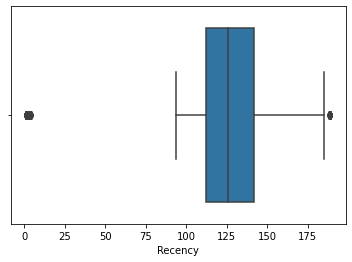

In [71]:
sns.boxplot(RFMScore['Recency'])

<AxesSubplot:xlabel='Frequency'>

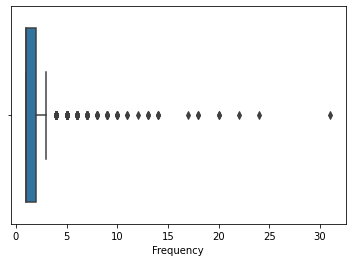

In [72]:
sns.boxplot(RFMScore["Frequency"])

<AxesSubplot:xlabel='Monetary'>

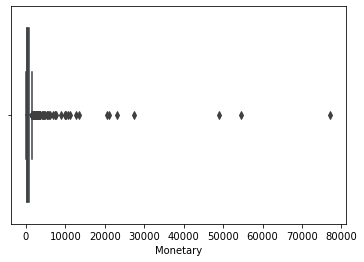

In [73]:
sns.boxplot(RFMScore["Monetary"])

<AxesSubplot:ylabel='Monetary'>

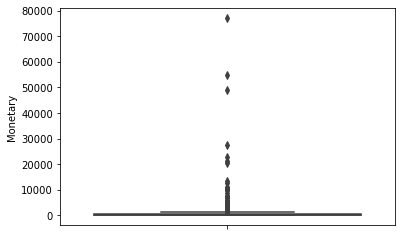

In [74]:
sns.boxplot(y="Monetary",data=RFMScore)

In [75]:
# create our function to define R,F and M segment

In [76]:
def Rscoring (x,p,d):
    if x<=d[p][0.25]:# we can say lowest the recency highest the marks
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

    
def Fscoring (x,p,d):# we can say highest the frequency  highest the marks
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
def Mscoring (x,p,d):# we can say highest the monetary highest the marks
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4 

In [77]:
RFMScore.columns

Index(['index', 'CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

In [78]:
RFMScore["R"]=RFMScore["Recency"].apply(Rscoring,args=("Recency",quantiles,))
RFMScore["F"]=RFMScore["Frequency"].apply(Fscoring,args=("Frequency",quantiles,))
RFMScore["M"]=RFMScore["Monetary"].apply(Mscoring,args=("Monetary",quantiles,))


In [83]:
RFMScore.head().drop(['index'],axis=1)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,142,2,77183.60,2,3,4
1,12347.0,134,1,475.39,2,1,3
2,12348.0,135,2,1120.24,2,3,4
3,12350.0,127,1,334.40,2,1,2
4,12352.0,100,5,1281.15,4,4,4


In [ ]:
# where 4,4,4 said best customer - marge RFM valyes and get sum of that

In [84]:
RFMScore['RFM_ID']= RFMScore.R.map(str)+RFMScore.F.map(str)+RFMScore.M.map(str)

In [87]:
RFMScore['RFM_SUM']= RFMScore[['R','F','M']].sum(axis=1)

In [88]:
RFMScore.head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM
0,0,12346.0,142,2,77183.60,2,3,4,234,9
1,1,12347.0,134,1,475.39,2,1,3,213,6
2,2,12348.0,135,2,1120.24,2,3,4,234,9
3,3,12350.0,127,1,334.40,2,1,2,212,5
4,4,12352.0,100,5,1281.15,4,4,4,444,12


In [91]:
# Sgrigate this sum with loyality level 

Loyality_level= ['Silver','GOld','Diamond','Platinum']

score_cuts= pd.qcut(RFMScore.RFM_SUM,q=4, labels=Loyality_level)# qcut- for quantile basis sagrigation

RFMScore['RFM_Loyality']= score_cuts.values
RFMScore.head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality
0,0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond
1,1,12347.0,134,1,475.39,2,1,3,213,6,GOld
2,2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond
3,3,12350.0,127,1,334.40,2,1,2,212,5,Silver
4,4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum


In [117]:
RFM_Loyality_wise_total={}
for i in range(0,len(RFMScore)):
    if RFMScore.loc[i]["RFM_Loyality"] in RFM_Loyality_wise_total:
        RFM_Loyality_wise_total[RFMScore.loc[i]['RFM_Loyality']]+=RFMScore.loc[i] ["RFM_SUM"]
    else:
        RFM_Loyality_wise_total[RFMScore.loc[i]['RFM_Loyality']]=RFMScore.loc[i] ["RFM_SUM"]

In [118]:
RFM_Loyality_wise_total

{'Diamond': 2241, 'GOld': 2314, 'Silver': 1958, 'Platinum': 3613}

In [146]:
Rdf=pd.DataFrame(RFM_Loyality_wise_total, index= [0])
Rdf

,Diamond,GOld,Silver,Platinum
0,2241,2314,1958,3613


In [149]:
Rdf1= RFMScore.groupby('RFM_Loyality').sum()
Rdf1


,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_SUM
RFM_Loyality,,,,,,,,,
Silver,344527,7224364.0,70473,483,92127.48,725,494,739,1958
GOld,256334,5497166.0,38982,440,153220.31,990,511,813,2314
Diamond,192067,4052664.0,29130,526,270683.12,745,696,800,2241
Platinum,225950,4989260.0,27730,1491,668525.91,1151,1244,1218,3613


In [ ]:
# For clustering purpose we only need-CustomerID,Recency,Frequency,Frequency

In [107]:
Newdf= RFMScore[['CustomerID','Recency','Frequency','Monetary']]

Newdf

,CustomerID,Recency,Frequency,Monetary
0,12346.0,142,2,77183.60
1,12347.0,134,1,475.39
2,12348.0,135,2,1120.24
3,12350.0,127,1,334.40
4,12352.0,100,5,1281.15
...,...,...,...,...
1423,18257.0,113,1,328.40
1424,18260.0,139,3,787.77
1425,18269.0,175,1,0.00
1426,18277.0,135,1,0.00


In [109]:
# Preprocesong- Standardization approach

from sklearn.preprocessing import StandardScaler

scaled_df= StandardScaler()

scaled_data=scaled_df.fit_transform(Newdf)
scaled_data


array([[-1.64897696,  0.53270017, -0.02604346, 23.72499212],
       [-1.64840727,  0.36579398, -0.46878225, -0.11003694],
       [-1.64783758,  0.38665725, -0.02604346,  0.09033299],
       ...,
       [ 1.72529952,  1.22118823, -0.46878225, -0.25775169],
       [ 1.72985705,  0.38665725, -0.46878225, -0.25775169],
       [ 1.73327519,  0.4283838 , -0.02604346, -0.19094618]])

In [110]:
# weare geting array value we should change it in dataframe

In [111]:
scaled_data_df= pd.DataFrame(scaled_data, index= Newdf.index,columns=Newdf.columns)

In [112]:
scaled_data_df

,CustomerID,Recency,Frequency,Monetary
0,-1.648977,0.532700,-0.026043,23.724992
1,-1.648407,0.365794,-0.468782,-0.110037
2,-1.647838,0.386657,-0.026043,0.090333
3,-1.646698,0.219751,-0.468782,-0.153846
4,-1.645559,-0.343557,1.302173,0.140331
...,...,...,...,...
1423,1.718463,-0.072335,-0.468782,-0.155710
1424,1.720172,0.470110,0.416695,-0.012973
1425,1.725300,1.221188,-0.468782,-0.257752
1426,1.729857,0.386657,-0.468782,-0.257752


### Buid Clustering Model

In [158]:
from sklearn.cluster import KMeans
sum_of_sq_dist={}# just creating one variable of blank
for k in range(1,15):# giving by default 1 to 15 clusters
    #we can assign n_clusters=k , iteration becoz we use elbow method to find perfect k value.
    km=KMeans(n_clusters=k,init="k-means++",max_iter=300)
    

In [159]:
km=km.fit(scaled_data_df)
sum_of_sq_dist[k]=km.inertia_

In [160]:
# difference between kmeans cluster and K IN KNN 
# K IN KNN IS FOR SUPERVISED AND KMEANS IS FOR UNSUPERVISED
# BOTH KNN AND KMEANS USED FOR DISTANCE METRICS

In [161]:
# visulization for getting elbow method to find the actual k value.


AttributeError: module 'matplotlib' has no attribute 'xlabel'

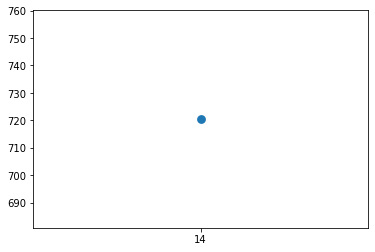

In [162]:
sns.pointplot(x=list(sum_of_sq_dist.keys()),
             y=list(sum_of_sq_dist.values()))
plt.xlabel("Number of clusters(k)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("ELBOW METHOD FOR OPTIMAL K VALUE")
plt.show()

In [172]:
km=KMeans(n_clusters=14,init="k-means++",max_iter=200)

In [173]:
y_kmeans=km.fit_predict(scaled_data_df)
y_kmeans

array([ 5, 13, 13, ...,  1,  6,  6])

In [174]:
RFMScore["CLUSTER"]=km.labels_

In [175]:
RFMScore.head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER
0,0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,5
1,1,12347.0,134,1,475.39,2,1,3,213,6,GOld,13
2,2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,13
3,3,12350.0,127,1,334.40,2,1,2,212,5,Silver,13
4,4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,4


In [178]:
seg_map = {
    r'[1][1-2][2-3]': 'Inactive',
    r'[1-2][1-3][3]': 'at_Risk',
    r'[1-2][1-4][4]': 'cant_loose',
    r'[1][1-4][2-4]': 'about_to_sleep',
    r'[3][3][3]': 'need_attention',
    r'[2-4][3-4][3-4]': 'loyal_customers',
    r'[3-4][3-4][2-4]': 'promising',
    r'[1-2][1-4][1-2]': 'new_customers',
    r'[2-4][2-3][2]': 'potential_loyalists',
    r'[3-4][1-3][1-2]': 'promising',
    r'[3-4][2-4][1-2]': 'new_customers',
    r'[3-4][1-3][2-4]': 'potential_loyalists',
    r'[3-4][3-4][3-4]': 'Most Important'
    
}
RFMScore['segment'] = RFMScore['RFM_ID'].replace(seg_map, regex=True)
#RMFScore_final(inplace=True)
#RMFScore_final.reset_index(inplace=True)
RFMScore.head(20)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_ID,RFM_SUM,RFM_Loyality,CLUSTER,segment
0,0,12346.0,142,2,77183.60,2,3,4,234,9,Diamond,5,cant_loose
1,1,12347.0,134,1,475.39,2,1,3,213,6,GOld,13,at_Risk
2,2,12348.0,135,2,1120.24,2,3,4,234,9,Diamond,13,cant_loose
3,3,12350.0,127,1,334.40,2,1,2,212,5,Silver,13,new_customers
4,4,12352.0,100,5,1281.15,4,4,4,444,12,Platinum,4,loyal_customers
5,5,12356.0,142,1,2271.62,2,1,4,214,7,GOld,13,cant_loose
6,6,12359.0,122,2,2386.41,3,3,4,334,10,Platinum,13,loyal_customers
7,7,12362.0,112,1,479.10,4,1,3,413,8,Diamond,13,potential_loyalists
8,8,12370.0,174,1,277.20,1,1,2,112,4,Silver,0,Inactive
9,9,12372.0,113,1,399.22,3,1,3,313,7,GOld,13,potential_loyalists


,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_SUM,CLUSTER
segment,,,,,,,,,,
Inactive,103059,2244098.0,24211,148,48960.30,148,148,349,645,453
about_to_sleep,15416,334084.0,3509,54,6909.10,22,73,48,143,84
at_Risk,68588,1427176.0,12594,139,46453.29,175,185,279,639,849
cant_loose,71140,1756246.0,16815,259,270270.34,197,302,476,975,927
loyal_customers,211390,4695500.0,25614,1411,628176.44,1103,1168,1138,3409,2278
need_attention,24142,469454.0,3584,60,15227.78,90,90,90,270,279
new_customers,235251,4843758.0,45723,387,47701.49,506,439,413,1358,2099
potential_loyalists,76755,1596579.0,9794,104,67464.69,368,104,345,817,954
promising,213137,4396559.0,24471,378,53393.39,1002,436,432,1870,2498


In [180]:
RFMScore['segment'].value_counts()

new_customers          315
loyal_customers        311
promising              286
Inactive               148
cant_loose             119
potential_loyalists    104
at_Risk                 93
need_attention          30
about_to_sleep          22
Name: segment, dtype: int64

In [181]:
# Create dataframe 

In [182]:
segments_count = RFMScore.groupby("segment").agg({"CustomerID": "count"})
segments_count.reset_index(inplace=True)
segments_count.columns = ['segment', 'count']
segments_count.head()

,segment,count
0,Inactive,148
1,about_to_sleep,22
2,at_Risk,93
3,cant_loose,119
4,loyal_customers,311


In [183]:
# Distribusion segmentation

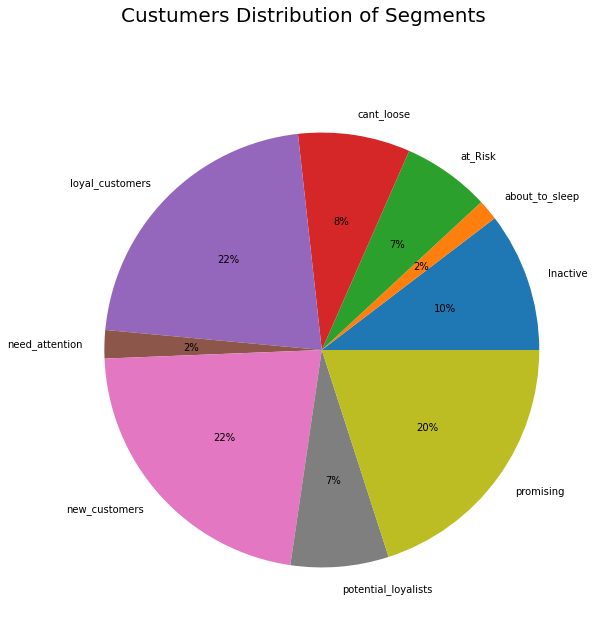

In [192]:
from matplotlib import pyplot as plt

fig  = plt.figure(figsize = (20,10)).suptitle('Custumers Distribution of Segments', fontsize=20)
plt.pie(segments_count["count"], labels = segments_count["segment"], autopct='%.0f%%')

plt.show()

In [193]:
agg_list=["mean", "count", "max"]
RFMScore[["segment","Recency","Frequency","Monetary"]].groupby("segment").agg(agg_list)

Recency            Frequency               Monetary  \
                           mean count  max      mean count max         mean   
segment                                                                       
Inactive             163.587838   148  189  1.000000   148   1   330.812838   
about_to_sleep       159.500000    22  189  2.454545    22   5   314.050000   
at_Risk              135.419355    93  170  1.494624    93   2   499.497742   
cant_loose           141.302521   119  189  2.176471   119   7  2271.179328   
loyal_customers       82.360129   311  135  4.536977   311  31  2019.859936   
need_attention       119.466667    30  126  2.000000    30   2   507.592667   
new_customers        145.152381   315  189  1.228571   315   6   151.433302   
potential_loyalists   94.173077   104  126  1.000000   104   1   648.698942   
promising             85.562937   286  126  1.321678   286   6   186.690175   

                                     
                    count       max  
segment                              
Inactive              148    716.11  
about_to_sleep         22    640.12  
at_Risk                93    717.02  
cant_loose            119  77183.60  
loyal_customers       311  54654.32  
need_attention         30    688.80  
new_customers         315    340.24  
potential_loyalists   104   1784.71  
promising             286    340.56

"""Apparently there are 23% of customers considered as Champions. These customers are responsible for a big share of your revenue so we can put a lot of effort into keeping imroving their experience. What we can do:

Give them something extra that the regulars do not get, for example, limited series of products or special discounts to make them feel valued.
Use communication similar to the "Loyal" segment. For example making them ambassadors, giving them a margin of your profits for bringing you, new customers.
Ask them for feedbacks as they might know the products and services very well."""